# Comparing Deep Networks vs Shallow Networks

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

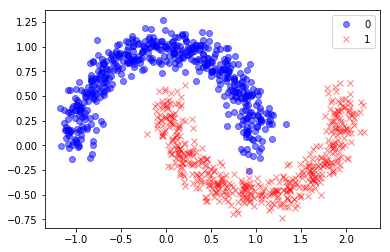

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

In [10]:
results

[0.31786663273970284, 0.8433333341280619]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.843


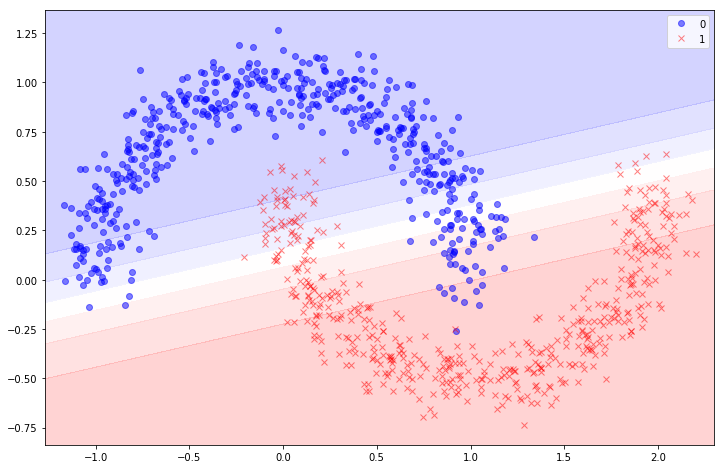

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

[0.0012867130098553996, 1.0]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

 32/300 [==>...........................] - ETA: 0sThe Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


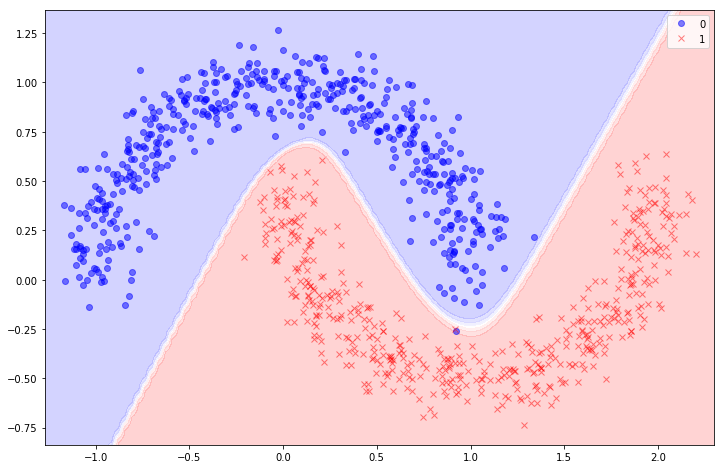

In [18]:
plot_decision_boundary(model, X, y)